In [1]:
!pip install deepface
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import os

drive.mount('/content/drive')
image_folder_path = "/content/drive/MyDrive/face_images/img"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Get list of images in the folder with .png, .jpg, and .jpeg extensions
image_files = [f for f in os.listdir(image_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Function to analyze and display images with bounding boxes
def analyze_and_display_image(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    # Convert the image from BGR (OpenCV default) to RGB (for displaying with matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform analysis using DeepFace
    analysis = DeepFace.analyze(img_path=image_path, actions=['gender', 'emotion'], enforce_detection=False)

    # Ensure analysis is always a list (for multiple faces)
    if not isinstance(analysis, list):
        analysis = [analysis]

    for face in analysis:
        # Get the coordinates of the detected face
        x, y, w, h = face['region']['x'], face['region']['y'], face['region']['w'], face['region']['h']

        # Determine the gender with the highest probability
        gender = face['gender']
        predicted_gender = max(gender, key=gender.get)
        predicted_gender_prob = gender[predicted_gender]

        # Set rectangle color based on gender
        if predicted_gender == "Woman":
            rect_color = (255, 192, 203)  # Pink color in BGR
        else:
            rect_color = (0, 0, 255)  # Blue color in BGR

        # Draw a rectangle around the face
        cv2.rectangle(img_rgb, (x, y), (x + w, y + h), rect_color, 2)

        # Prepare the text to display (dominant emotion only)
        text = (f"Gender: {predicted_gender} ({round(predicted_gender_prob * 100, 1)}%)\n"
                f"Emotion: {face['dominant_emotion']} "
                f"({round(face['emotion'][face['dominant_emotion']] * 100, 1)}%)")

        # Display the emotion text in lila color
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_color = (255, 0, 255)  # Lila color in BGR

        # Split text into lines for multi-line display
        for i, line in enumerate(text.split('\n')):
            text_y = y - 10 - (i * 20) if y - 10 > 10 else y + (i * 20) + 10
            cv2.putText(img_rgb, line, (x, text_y), font, font_scale, text_color, font_thickness, lineType=cv2.LINE_AA)

    # Display the image with bounding boxes and labels
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 57.70it/s]


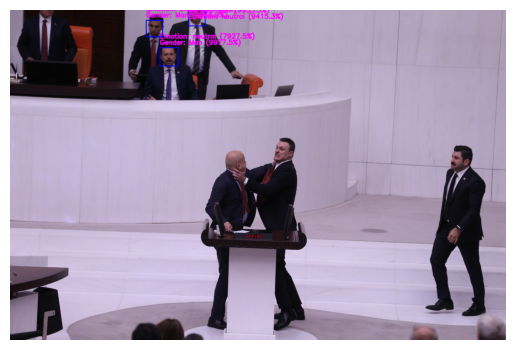

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 50.30it/s]


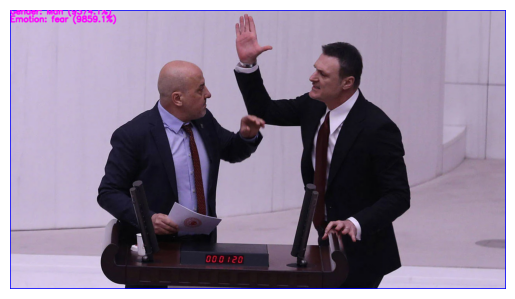

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 46.78it/s]


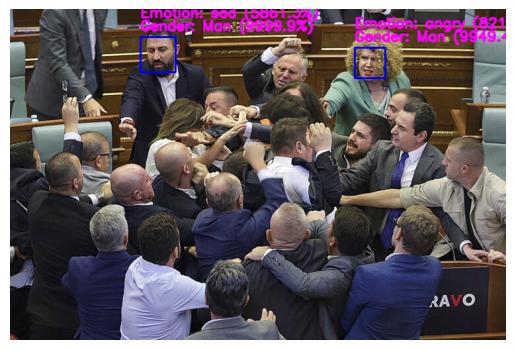

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 53.47it/s]


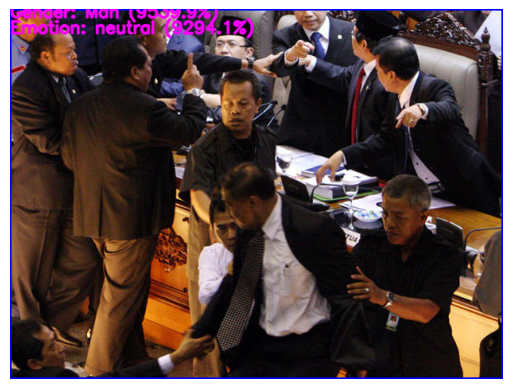

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 38.51it/s]


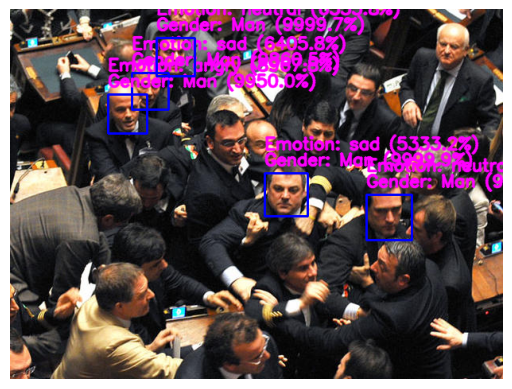

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 38.44it/s]


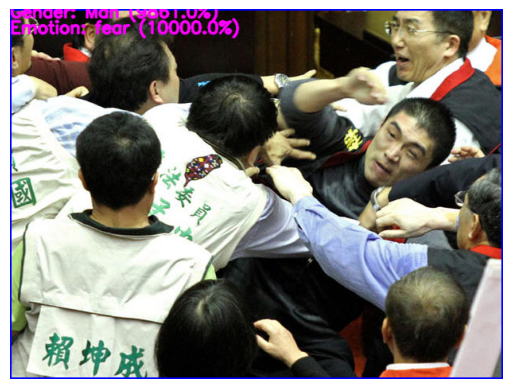

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 54.87it/s]


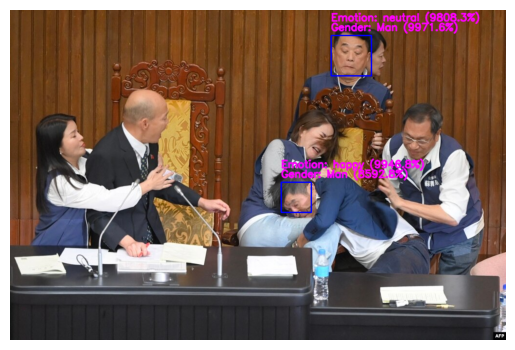

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 51.33it/s]


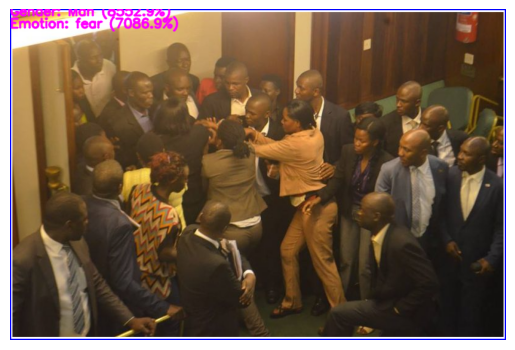

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 42.62it/s]


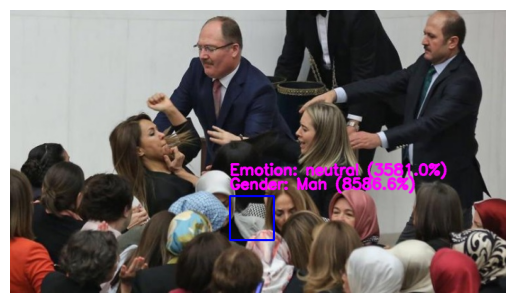

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 43.22it/s]


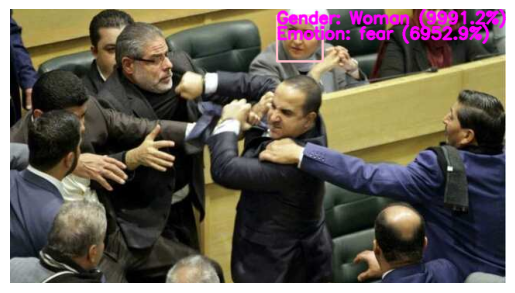

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 39.31it/s]


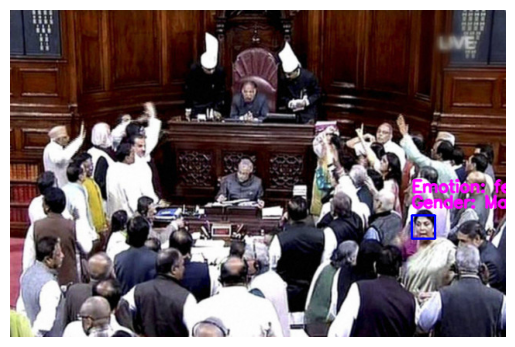

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 52.32it/s]


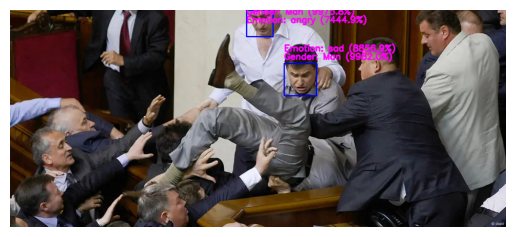

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 52.94it/s]


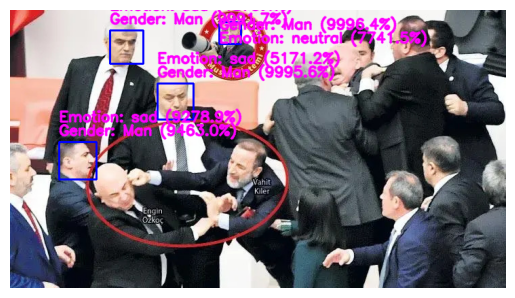

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 42.53it/s]


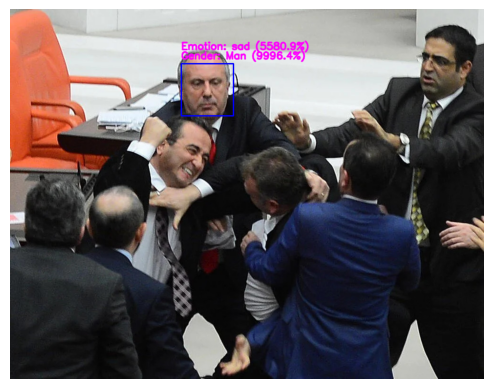

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 48.78it/s]


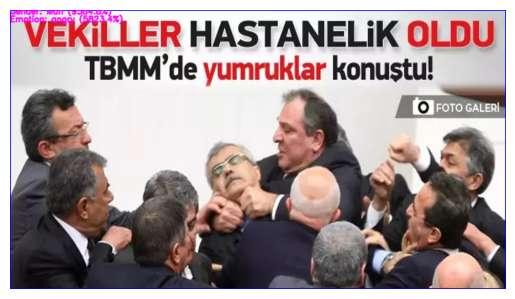

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 53.53it/s]


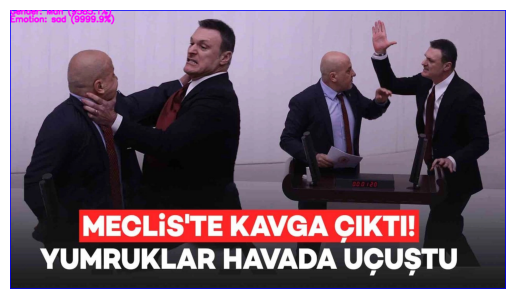

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 47.61it/s]


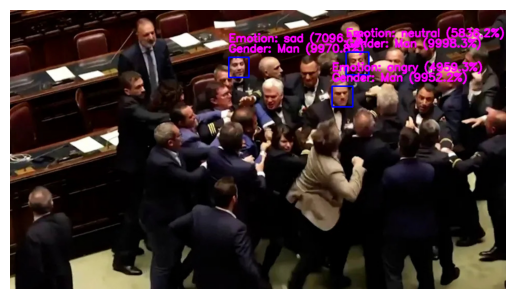

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 48.89it/s]


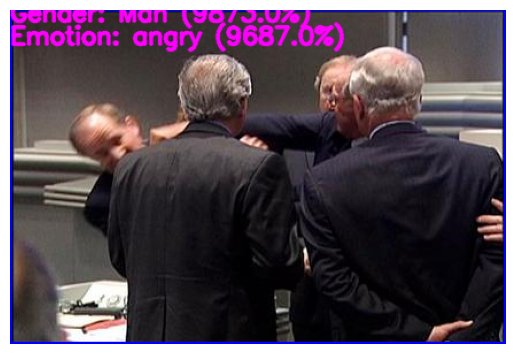

Action: emotion: 100%|██████████| 2/2 [00:00<00:00, 57.03it/s]


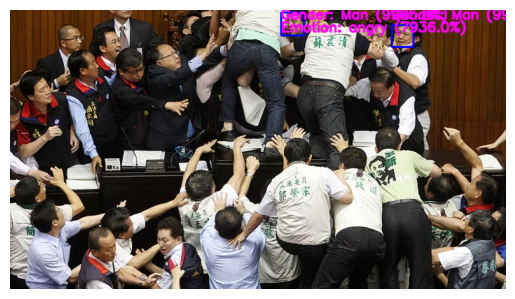

In [3]:
# Loop through each image and analyze it
for image_file in image_files:
    image_path = os.path.join(image_folder_path, image_file)
    analyze_and_display_image(image_path)